# 第11周作业 



#### 题 1：编制程序实现以下功能（自动给小学生出加法减法题）
- 100以内的两个数的加减法
- 总共出60道题
- 每行出题三道(共20行）
- 如：
    `32+64=______     93-27=______     55-17=_______`
- 输出到文件 question.txt中
- 注意不能出现小数减大数，加起来不能超过100

In [17]:
# 题 1 
# 代码完成如下
import random
l=[]
fuhao=['+','-']
for i in range(0,60):
    a=random.randint(1,99);b=random.randint(1,100-a)
    k=random.randint(0,1)
    m=str(max(a,b))+fuhao[k]+str(min(a,b))+"=______     "
    l.append(m)

with open("question.txt","w")as f:
    for j in range(len(l)):
        if (j+1)%3==0:
            n=l[j-2]+l[j-1]+l[j]
            print(n)
            f.write(n+"\n")

82+15=______     92-8=______     33+8=______     
53-35=______     16-15=______     37-10=______     
22+10=______     65-25=______     62-26=______     
67+10=______     47-10=______     30-9=______     
95+5=______     12+1=______     48+26=______     
49+45=______     47-3=______     95-2=______     
86-13=______     86-10=______     87+2=______     
85-9=______     89-9=______     67+24=______     
40-32=______     96+4=______     83+6=______     
84-14=______     68+16=______     92-4=______     
49-39=______     74-2=______     45-5=______     
95-5=______     95-5=______     74-1=______     
43-35=______     30-15=______     83-15=______     
58-26=______     97+3=______     74+8=______     
34-19=______     53-21=______     77-19=______     
80+16=______     74-26=______     60+21=______     
61+36=______     99-1=______     78-4=______     
53-47=______     83+12=______     63+5=______     
29-10=______     93-7=______     78+3=______     
96-3=______     84+16=______     48+4

#### 题 1（附加）：请将上述结果输出到word文件中
- 使用python-docx模块


In [19]:
# 题 1 附加代码写于此
!pip install python-docx
from docx import Document

file=Document()
for i in range(len(l)):
        if (i+1)%3==0:
            n=l[i-2]+l[i-1]+l[i]
            file.add_paragraph(n+"\n")
file.save("question.docx")




#### 题 2：——  散点找中线
- 随机生成n个点
- 从n个点中，随机过某一点，生成一条直线，使得：
  - 该线将已知点分成2个区，两个区的点数相同
  - 当n为奇数时，两边点数一样
  - 当n为偶数时，可以一边比另一边多一个点
- 文件输出到lsp文件，可以在CAD中检查结果是否正确

In [20]:
# 题 2
from icecream import ic
import random
n=int(input("请随机输入一个值（大于3小于100）："))
l=[]
for i in range(0,n):
    l.append((random.randint(0,100),random.randint(0,100))) #点的列表
print("随机生成点：",l)

j=random.randint(0,n-1)
m=l[j] #随机过一点
ic(m)
l.remove(m)
l1=[];l2=[]
for each in l:
    if each[0]>m[0]:
        l1.append(each)#在已知点右边的点列表
    else:
        l2.append(each)#在已知点左边的点列表
def k(n):
    k=(n[1]-m[1])/(n[0]-m[0])#求斜率
    return k
xielv1={each:k(each) for each in l1}
l1=sorted(xielv1.items(),key=lambda x:x[1],reverse=False)
xielv2={each:k(each) for each in l2}
l2=sorted(xielv2.items(),key=lambda x:x[1],reverse=True)
l3=l1+l2
ic(l3)

if n%2!=0:
    k1=random.uniform(l3[(n-1)//2-1][1],l3[(n-1)//2][1])
else:
    k1=random.uniform(l3[(n-2)//2-1][1],l3[(n-2)//2+1][1])
b=m[1]-k1*m[0]

if b>0:
    print("随机生成过随机点",m,"的散点中线：","y=",k1,"x+",b)
elif b<0:
    print("随机生成过随机点",m,"的散点中线：","y=",k1,"x-",abs(b))
else:
    print("随机生成过随机点",m,"的散点中线：","y=",k1,"x")
    
with open("dot.lsp","w")as f:
    f.write(f"""(command "donut" 0.1 0.1 '({m[0]} {m[1]})"")\n""")
    for each in l:
        f.write(f"""(command "donut" 0.1 0.1 '({each[0]} {each[1]})"")\n""")
    x=random.randint(0,100)
    y=k1*(x-m[0])+m[1]
    f.write(f"""(command "line" '({x} {y})'({m[0]} {m[1]}))""")

请随机输入一个值（大于3小于100）：9


ic| m: (49, 51)
ic| l3: [((64, 5), -3.066666666666667),
         ((82, 8), -1.303030303030303),
         ((54, 72), 4.2),
         ((47, 35), 8.0),
         ((23, 13), 1.4615384615384615),
         ((34, 44), 0.4666666666666667),
         ((0, 32), 0.3877551020408163),
         ((44, 71), -4.0)]


随机生成点： [(34, 44), (44, 71), (82, 8), (64, 5), (49, 51), (0, 32), (23, 13), (47, 35), (54, 72)]
随机生成过随机点 (49, 51) 的散点中线： y= 7.840468888311664 x- 333.18297552727154


#### 题 3 散点求包络线
- 已知若干散点（点数大于3）
- 尝试找出一条包络线
- 该包络线经过这些散点
- 所有的点被该包络线包围住
- 文件输出到lsp文件，并可以在CAD中检查
- 该包络线是一个凸多边形（即所有点都在该凸多边形的一侧（在线上也可以））


In [68]:
#以一点为边线，连接其他点，使所有点在这条线的一边
# 题 3
from icecream import ic
import random
a=int(input("请随机输入一个值（大于3）："))
l=[]
for i in range(0,a):
    l.append((random.randint(0,100),random.randint(0,100))) #点的列表
print("随机生成点：",l)
l2=[]
for m in l:
    l1=l.copy()
    l1.remove(m)
    for n in l1:
        l1.remove(n)
        up=0;down=0
        for each in l1:
            if each[1]-(m[1]-n[1])/(m[0]-n[0])*(each[0]-m[0])-m[1]>0:
                up+=1
            elif each[1]-(m[1]-n[1])/(m[0]-n[0])*(each[0]-m[0])-m[1]<0:
                down+=1
            else:
                up+=1;down+=1
        if up==a-2 or down==a-2:
            if [m,n] not in l2:
                l2.append([m,n])
ic(l2)

with open("dot2.lsp","w")as f:
    for each in l:
        f.write(f"""(command "donut" 1 1 '({each[0]} {each[1]})"")\n""")
    for each in l2:
        f.write(f"""(command "line" '({each[0][0]} {each[0][1]})'({each[1][0]} {each[1][1]})"")\n""")
        

请随机输入一个值（大于3）：5


ic| l2: [[(70, 15), (30, 44)], [(30, 44), (70, 15)], [(98, 77), (70, 15)]]


随机生成点： [(70, 15), (30, 44), (98, 77), (31, 81), (2, 100)]


#### 题 4 求下列结构的位移曲线
- 学号为奇数的做左边题目；学号为偶数的做右边题目
<img src="week11.png">

- (a) 其中L1=3m,L2=3m,L3=2m;q=2kN/m  Fp=1kN
- (b) L1=6m,L2=1m,L3=2m,L4=2m;q=2kN/m,Fp=6kN
- 尽量将结果用matplotlib模块绘制出来
- 或者用lsp语言输出到CAD
- 完成函数

In [57]:
# a组
L1, L2, L3 = 3,3,2
L = [L1, L2, L3]
q,Fp=2,1
E,I=2.0E11, 1

In [73]:
def deflection(E,I,L,q,Fp)->(list, list):
    ## 提示输出两列数据
    #  第一个列表为梁长方向的位置（左边起点为0）
    #  第二个列表为不同点的挠度
    xloc, disp = [],[] #list(range(1,10)), list(range(2,11))
    wanju=[]
    pass
    ## 代码完成在这里
    #FA=5;FB=12
    x=0
    while x>=0 and x<=(L1+L2+L3):
        if x<=(L1+L2):
            M=1/2*q*x**2-5*x
            #EIy''=-M
            y=(-1/24*q*x**4+5/6*x**3-12*x)/(E*I)
        elif (L1+L2)<x<=(L1+L2+L3):
            M=1/2*q*(L1+L2+L3-x)**2+Fp*(L1+L2+L3-x)
            y=(1/12*x**4-17/6*x**3+36*x**2-759/2*x+1485)/(E*I)
        xloc.append(x)
        disp.append(y)
        x+=0.01    
    return xloc, disp

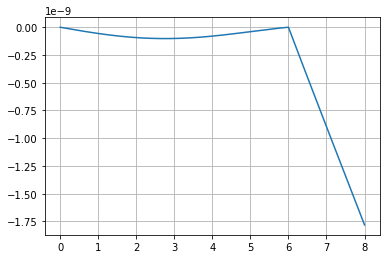

In [74]:
import  matplotlib.pyplot as plt
xloc, disp = deflection(E,I,L,q,Fp)
plt.figure()
plt.plot(xloc, disp)
plt.grid()
plt.show()

#### 题 5(附加）网页抓取
- 尝试抓取下列网页的人员信息：
- https://civileng.tongji.edu.cn/18338/list.htm
- 输出相应的信息-尽量整齐划一输出

In [15]:
import requests
from bs4 import BeautifulSoup
import time
import random
url = 'https://civileng.tongji.edu.cn/18338/list.htm'
r = requests.get(url)
r.encoding = r.apparent_encoding
soup = BeautifulSoup(r.text, "html.parser")
soup
# 题 4 代码







<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>教授（研究员）</title>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible">
<meta content="同济土木学院, 土木学院, 土木工程" name="keywords">
<meta content="同济土木学院, 土木学院, 土木工程" name="description"/>
<link href="/_css/_system/system.css" rel="stylesheet" type="text/css"/>
<link href="/_upload/site/1/style/84/84.css" rel="stylesheet" type="text/css"/>
<link href="/_upload/site/01/54/340/style/319/319.css" rel="stylesheet" type="text/css"/>
<link href="/_css/tpl2/system.css" rel="stylesheet" type="text/css"/>
<link href="/_js/_portletPlugs/sudyNavi/css/sudyNav.css" rel="stylesheet" type="text/css">
<link href="/_js/_portletPlugs/datepicker/css/datepicker.css" rel="stylesheet" type="text/css"/>
<link href="/_js/_portletPlugs/simpleNews/css/simplenews.css" rel="stylesheet" type="text/css"/>
<link href="/_css/tpl2/default/default.css" rel="stylesheet" type="text/css"/>
<script jque

## 结束